# EE613 - Linear Regression I - Exercise 2

## Fitting a plane to 3D Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv,pinv
from numpy import dot,power

#### Load Laser Data 

In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

In [4]:
ROOT_DIR = '../python_data/laser_profile/'
file_name = ROOT_DIR +'laser_data.npy'
data = np.load(open(file_name,'rb'))

#### Plot data 

Text(0.5,0,'x3')

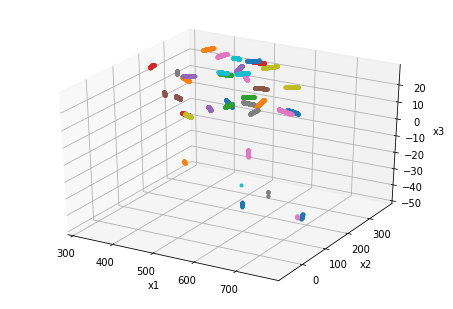

In [5]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
for i in range(data.shape[0]):
    ax.plot3D(data[i,:,0], data[i,:,1], data[i,:,2],'.' )
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

#### Question 1: The data points in the above figures are located on a plane, but there are a few outliers. Fit a plane to the data points using linear regression with L1 norm. (Hint: use the equation of plane, $x_3 = ax_1 + bx_2 + c$)  

#### Solution 

In [6]:
data = data.reshape([-1,3]) #collapsing the multiple lines data into a single data

#### Formulate a linear regression problem of 
$$XA = Y$$
where 
$$X = [x_1 ~ x_2 ~ 1]$$
$$A = [a ~ b ~ c]$$ 
$$Y = [x_3]$$ 

In [7]:
X = np.vstack([data[:,0], data[:,1], np.ones(data.shape[0])]).T
Y = data[:,2]

#### Standard LS 

In [8]:
A = dot(pinv(X),Y)
#calculate the prediction
Z = dot(X,A)

Text(0.5,0,'x3')

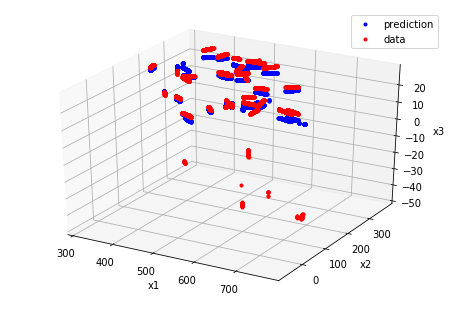

In [9]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data[:,0],data[:,1],Z,'.b',label='prediction')
ax.plot3D(data[:,0],data[:,1],data[:,2],'.r', label = 'data')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

#### IRLS for L1 norm linear regression 

In [10]:
#Calculate IRLS
nb_data = data.shape[0]
W = np.eye(nb_data)
res_set = []
p = 1
for i in range(20):
    Aw = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,Y)))
    diff = np.abs(Y-dot(X,Aw)).flatten()
    res_set.append(np.sum(diff))
    W = np.diag(diff**(p-2))
Z2 = dot(X,Aw)

Text(0.5,0,'x3')

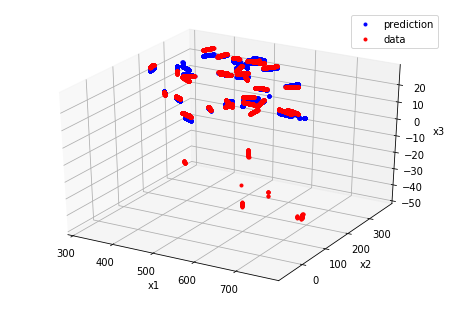

In [11]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data[:,0],data[:,1],Z2,'.b',label='prediction')
ax.plot3D(data[:,0],data[:,1],data[:,2],'.r', label = 'data')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

#### Remove Outliers 

In [12]:
diff = np.abs(Y - dot(X,Aw)).flatten()
std_dev = np.std(diff)
mean_data = np.mean(diff)
selected_index = np.abs(diff-mean_data) < 3*std_dev #select points which are within 3 standard deviation

In [13]:
data_filtered = data[selected_index]

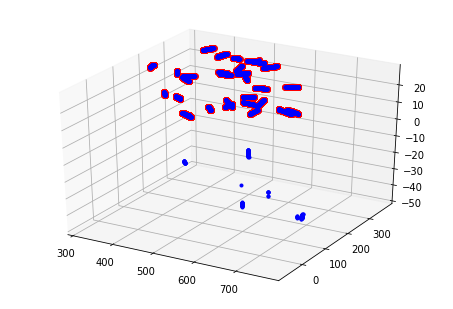

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(data_filtered[:,0],data_filtered[:,1],data_filtered[:,2],'or')
ax.plot3D(data[:,0],data[:,1],data[:,2],'.b')